In [11]:
import pandas as pd
import geopandas as gpd
import csv
import warnings
warnings.filterwarnings("ignore")

In [12]:
cityname='NTPC'
df2 = pd.read_csv(f'../03.dataset/{cityname}_model_features.csv', encoding = 'utf-8')
# df2.drop(['土地位置建物門牌','都市土地使用分區','主要建材','車位總價元','建物現況格局-隔間','lon','lat','備註',
#          '土地面積平方公尺','租賃年月日','租賃筆棟數','租賃層次','建物總面積平方公尺','有無附傢俱','總額元',
#          '車位面積平方公尺','車位總額元'],axis=1,inplace=True)
df2.drop(['土地位置建物門牌','都市土地使用分區','主要建材','車位總價元','建物現況格局-隔間','lon','lat','備註'],axis=1,inplace=True)

In [13]:
df_lsit = df2.columns.values.tolist()
for c in df_lsit:
    print(f'{c}: {df2[c].unique()}')

Unnamed: 0.1: [     0      1      2 ... 210398 210399 210400]
Unnamed: 0: [     0      1      2 ... 210398 210399 210400]
鄉鎮市區: ['八里區' '蘆洲區' '淡水區' '中和區' '五股區' '樹林區' '新莊區' '三重區' '土城區' '林口區' '新店區' '汐止區'
 '板橋區' '三芝區' '三峽區' '永和區' '深坑區' '泰山區' '瑞芳區' '鶯歌區' '金山區' '萬里區' '石門區' '貢寮區'
 '石碇區' '雙溪區' '烏來區']
交易標的: [0 1]
建物現況格局-房: [ 2  3  1  4  5  0  7 10  6 11  8  9 14 42 13 12 35 31 16 17 15 21 18]
建物現況格局-廳: [ 1  2  3  0  4  5  7  8  9  6 10 18 12 14 21 22]
建物現況格局-衛: [ 1  2  3  0  7  4 10  5  6 11  8  9 14 13 12 35 16 17 15 22 21 18]
有無管理組織: [0 1]
單價元平方公尺: [ 44517.  96624.  48820. ... 110993. 179111. 158356.]
主建物面積: [  0.    70.47  53.43 ... 165.48 174.66 139.45]
附屬建物面積: [ 0.    1.42  0.6  ... 25.05 21.92 18.28]
陽台面積: [ 0.    9.72  5.36 ... 29.72 39.26 24.42]
電梯: [1 0]
屋齡: [  3.  15.  17.  16.  10.   5.   8.  18.  28.  31.  20.  14.  25.  22.
  13.   1.   7.  12.  24.  32.  19.   2.   4.  35.   9.  29.  36.  34.
  11.   6.   0.  27.  33.  21.  23.  39.  30. 889.  26.  38.  37.  40.
  41. 909.  42.  4

In [14]:
# df2.drop(['near_hospital_dist','near_university_dist_dist','NEAR_LRT_250','NEAR_LRT_500','NEAR_LRT_750','near_lrt_dist','NEAR_MRT_250','NEAR_MRT_500',
#          'NEAR_MRT_750','near_mrt_dist'],axis=1,inplace=True)

In [15]:
df2 = df2.loc[df2['建物現況格局-房'] < 25]
df2 = df2.loc[df2['floor'] < 50]
df2 = df2.loc[df2['建物現況格局-廳'] < 21]
df2 = df2.loc[df2['建物現況格局-衛'] < 18]
df2 = df2.loc[df2['屋齡'] < 100]
df2 = df2.loc[df2['交易年份'] < 112]
df2 = df2.loc[df2['floor'] > 1]
df2 = df2.loc[df2['total_floor'] > 1]
df2 = df2.loc[df2['單價元平方公尺'] > 0]
df2.to_csv(f'../03.dataset/{cityname}_model_features_clean.csv')

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='單價元平方公尺', ylabel='Density'>

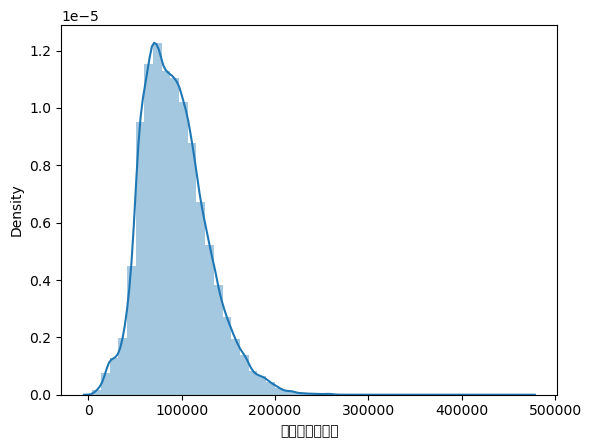

In [6]:
sns.distplot(df2['單價元平方公尺'])

In [7]:
print('Skewness: %f' % df2['單價元平方公尺'].skew())
print('Kurtosis: %f' % df2['單價元平方公尺'].kurt())

Skewness: 0.657440
Kurtosis: 0.717704


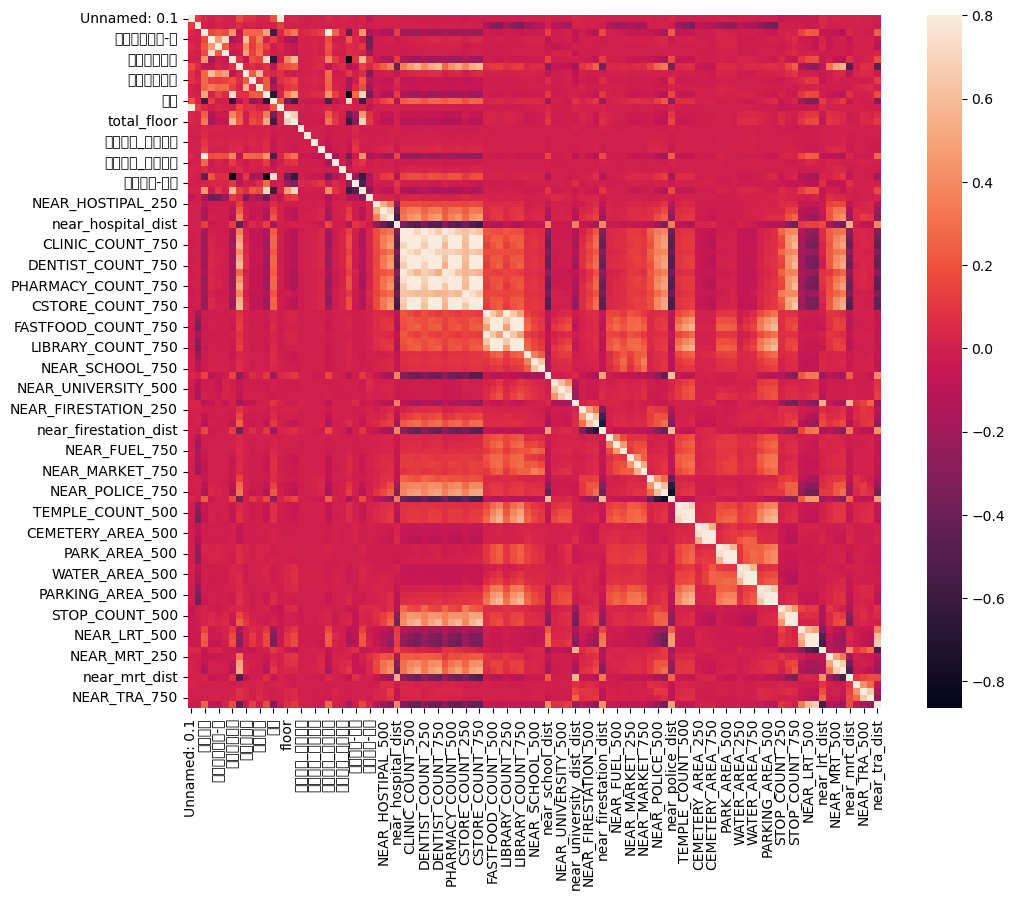

In [8]:
import matplotlib.pyplot as plt
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

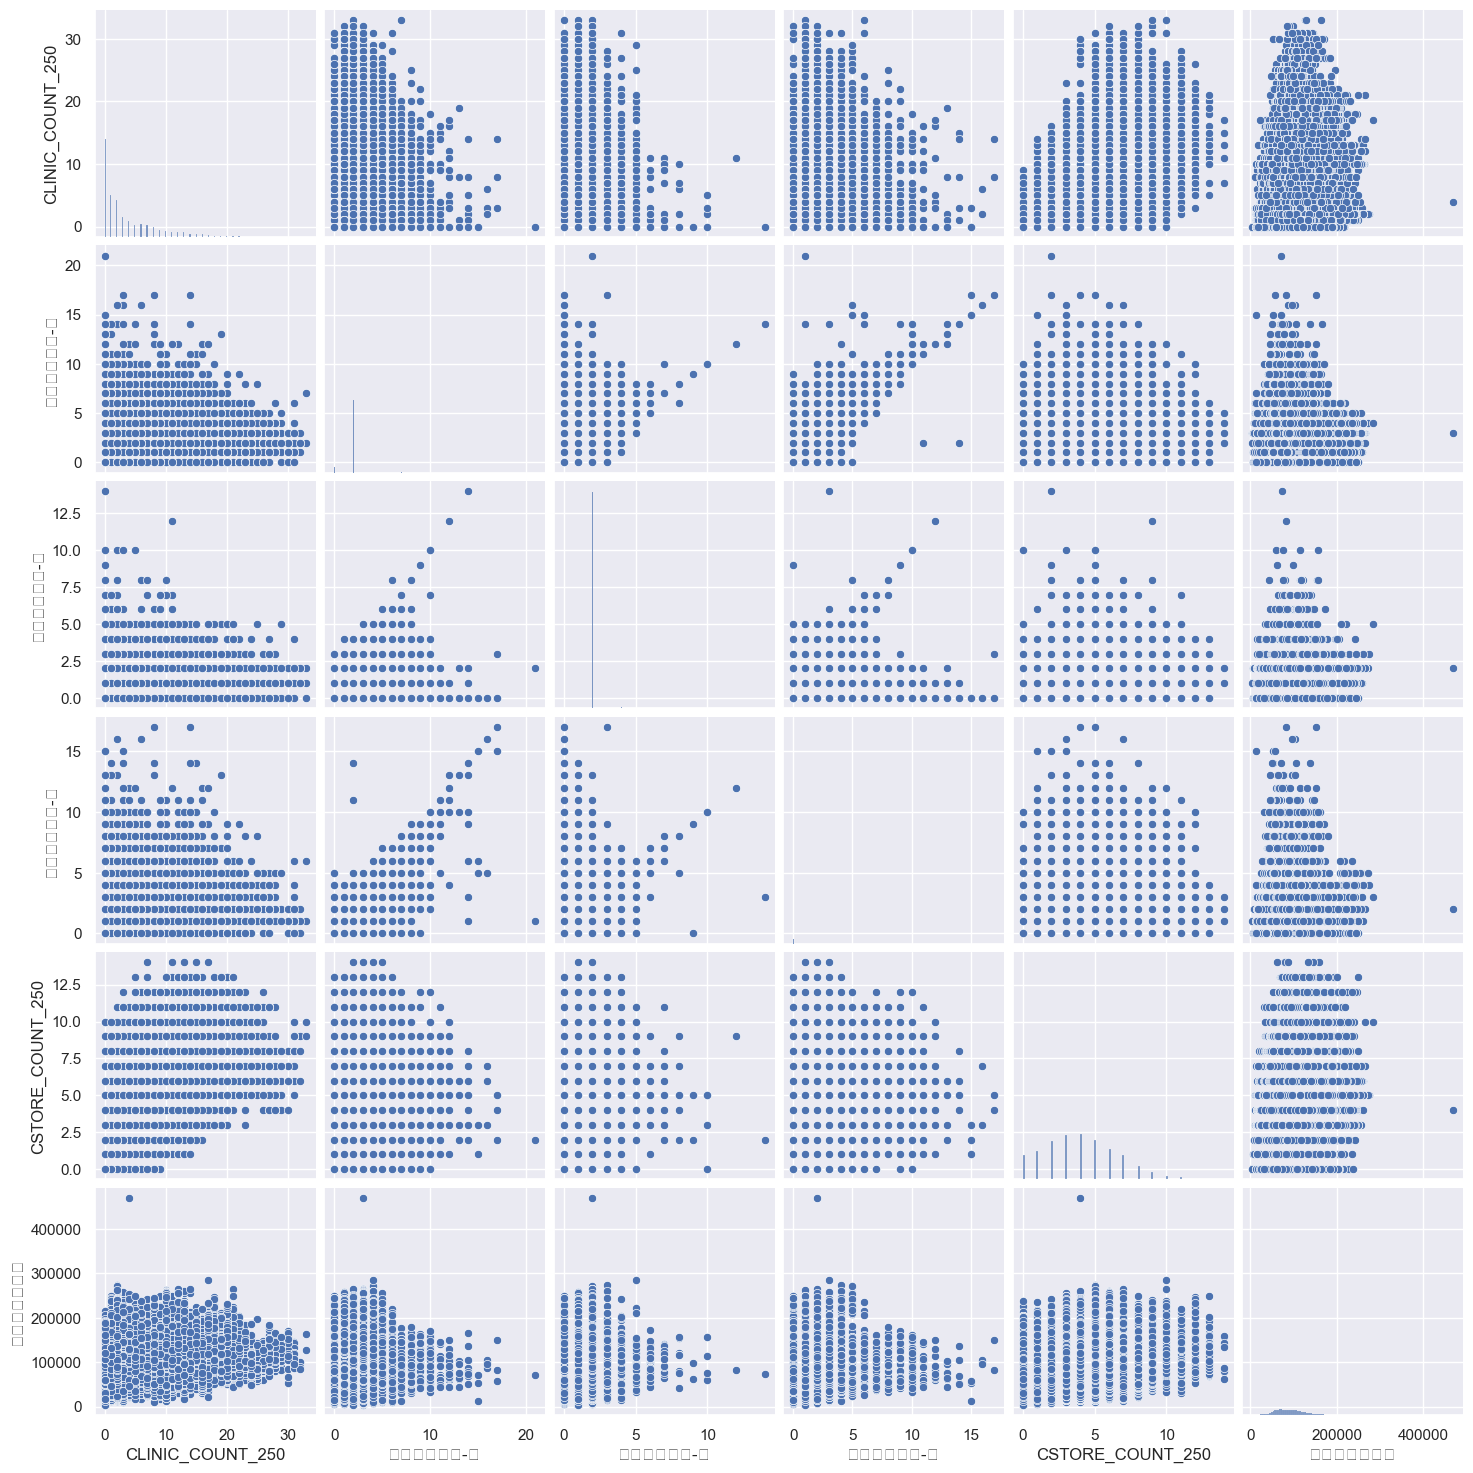

In [9]:
sns.set()
cols = [ 'CLINIC_COUNT_250', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', 'CSTORE_COUNT_250', '單價元平方公尺']
sns.pairplot(df2[cols], size = 2.5)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


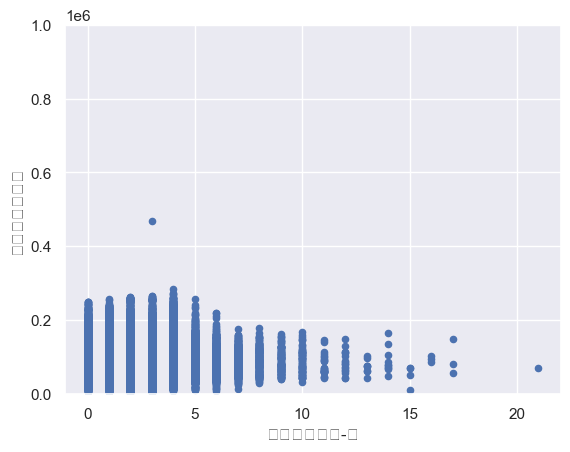

In [10]:
var = '建物現況格局-房'
data = pd.concat([df2['單價元平方公尺'], df2[var]], axis=1)
data.plot.scatter(x=var, y='單價元平方公尺', ylim=(0,1000000));

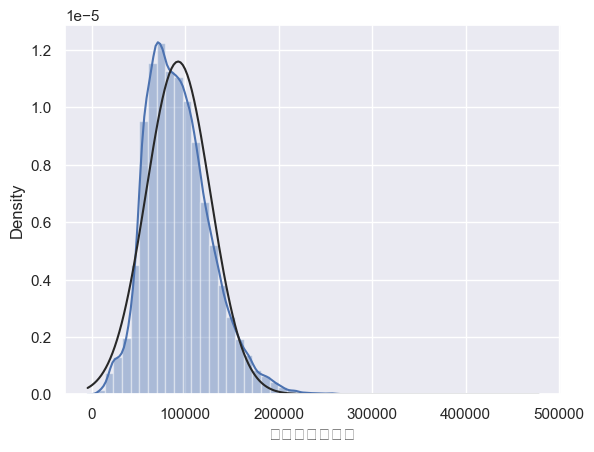

<Figure size 640x480 with 0 Axes>

In [11]:
from scipy.stats import skew, norm
sns.distplot(df2['單價元平方公尺'], fit=norm);
fig = plt.figure()

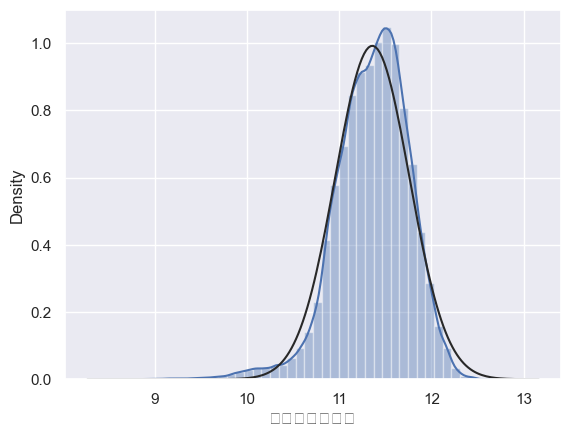

<Figure size 640x480 with 0 Axes>

In [12]:
import numpy as np
df2['單價元平方公尺'] = np.log(df2['單價元平方公尺'])

sns.distplot(df2['單價元平方公尺'], fit=norm);
fig = plt.figure()

In [ ]:
#df2.to_csv('../03.dataset/TPE_model_features_clean.csv')